## Libraries

In [1]:
# Import the libraries that we might use

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
import datetime as dt
from datetime import timedelta
warnings.filterwarnings('ignore')

sns.set()

# 2. Exploratory Data Analysis

## Retrieving Cleaned Dataset

In [2]:
%store -r cleandata #retrieve previously cleaned dataset

no stored variable or alias #retrieve
no stored variable or alias previously
no stored variable or alias cleaned
no stored variable or alias dataset


## 2.1 Price

### 2.1.1 Price Distribution

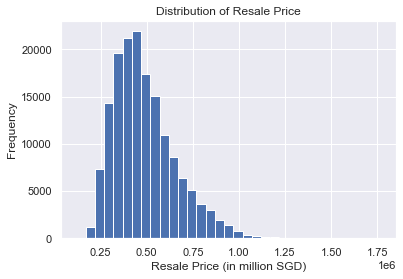

In [3]:
# First, we create histogram to see to price distribution

cleandata['resale_price'].hist(bins = np.arange(120000, 1800000, 50000))
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price (in million SGD)')
plt.ylabel('Frequency')
plt.show()

# We can see that the price distribution is right-skewed

In [4]:
cleandata['resale_price'].describe()

count    1.604540e+05
mean     4.865195e+05
std      1.683454e+05
min      1.400000e+05
25%      3.620000e+05
50%      4.550000e+05
75%      5.800000e+05
max      1.500000e+06
Name: resale_price, dtype: float64

### 2.1.2 Average Flat Price by Town

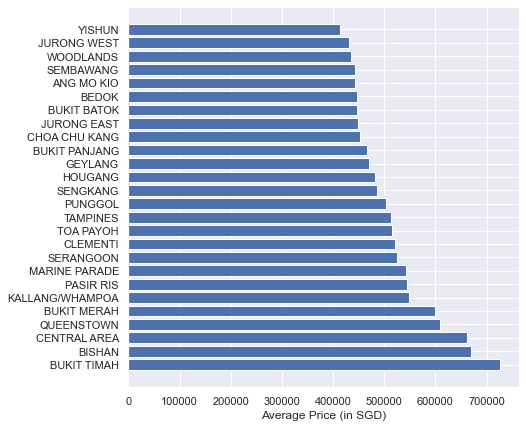

In [5]:
price_town = cleandata.groupby('town')['resale_price'].mean().sort_values(ascending = False)
plt.figure(figsize=(7, 7))
plt.barh(price_town.index, price_town)
plt.xlabel('Average Price (in SGD)')
plt.show()

In [6]:
price_town.iloc[0:5]

# We can see that the 5 most expensive towns in terms of HDB flats prices are:
# Bukit Timah, Bishan, Central Area, Queenstown, and Bukit Merah, respectively

town
BUKIT TIMAH     726942.141516
BISHAN          670034.589057
CENTRAL AREA    661859.976405
QUEENSTOWN      608808.670313
BUKIT MERAH     598241.930242
Name: resale_price, dtype: float64

### 2.1.3 Average Flat Price per sqm by Town

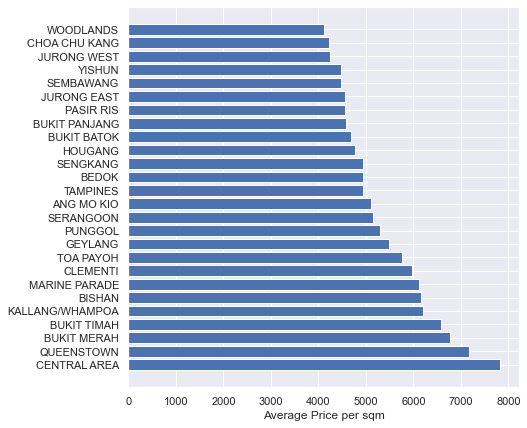

In [7]:
cleandata['resale_price_sqm'] = cleandata['resale_price']/cleandata['floor_area_sqm']
price_sqm_town = cleandata.groupby('town')['resale_price_sqm'].mean().sort_values(ascending = False)
plt.figure(figsize=(7, 7))
plt.barh(price_sqm_town.index, price_sqm_town)
plt.xlabel('Average Price per sqm')
plt.show()

In [8]:
price_sqm_town.iloc[0:5]

town
CENTRAL AREA       7830.855084
QUEENSTOWN         7172.270056
BUKIT MERAH        6760.307146
BUKIT TIMAH        6588.592966
KALLANG/WHAMPOA    6198.730352
Name: resale_price_sqm, dtype: float64

### 2.1.4 Average Flat Price by Flat Type

#### -  Boxplot

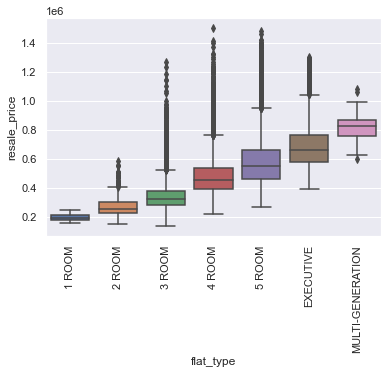

In [9]:
sns.boxplot(data = cleandata.sort_values('flat_type'), y = 'resale_price', x= 'flat_type')
plt.xticks(rotation = 90)
plt.show()

# Based on visual examination, resale_price and flat_type seemingly exhibit linear relationship

#### - Line Chart 

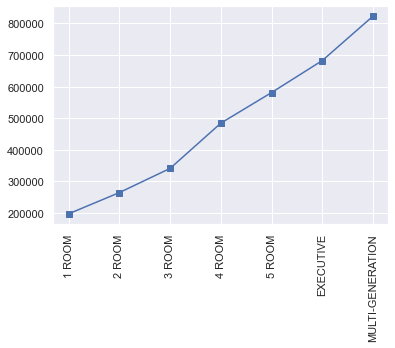

In [10]:
price_type = cleandata.groupby('flat_type')['resale_price'].mean()
plt.plot(price_type.index, price_type, marker = 's')
plt.xticks(rotation = 90)
plt.show()

# The graph below shows that flat_types and resale_price have nearly linear relationship
# We will use this information to determine our model's features later on

### 2.1.5 Average Price by Storey Range

#### - Boxplot

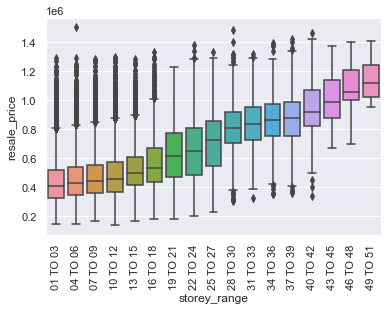

In [11]:
sns.boxplot(data = cleandata.sort_values('storey_range'), y = 'resale_price', x= 'storey_range')
plt.xticks(rotation = 90)
plt.show()

# resale_price and Storey_range also exhibit linear relationship

#### - Line chart

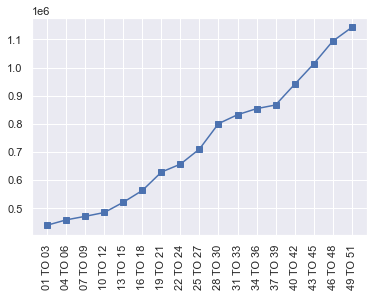

In [12]:
price_storey = cleandata.groupby('storey_range')['resale_price'].mean()
plt.plot(price_storey.index, price_storey, marker = 's')
plt.xticks(rotation = 90)
plt.show()

# The graph below also shows that storey_range and resale_price have nearly linear relationship

### 2.1.6 Average Monthly Price

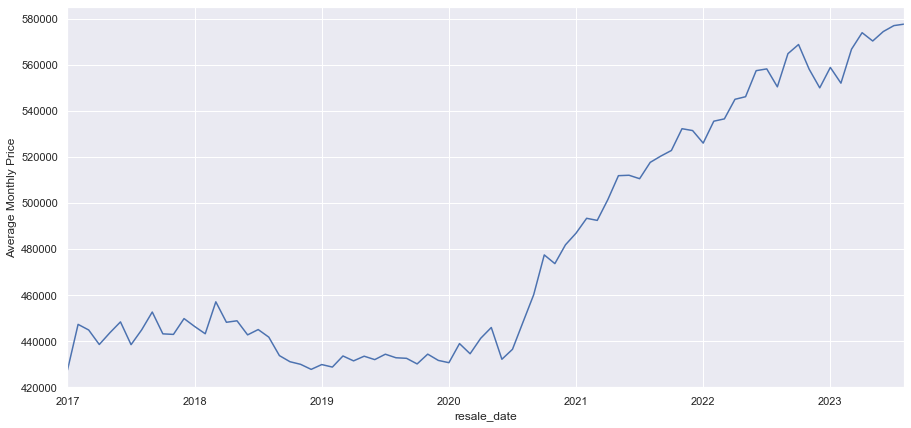

In [13]:
price_time = cleandata.groupby('resale_date')['resale_price'].mean()

plt.figure(figsize=(15, 7))
price_time.plot()
plt.ylabel('Average Monthly Price');

# We can see somewhat clear trend here
# Price was stable in 2017, but decreased in early 2018, and then started to increase in mid 2020

## 2.2 Number of Transactions

### 2.2.1 Transactions by Town

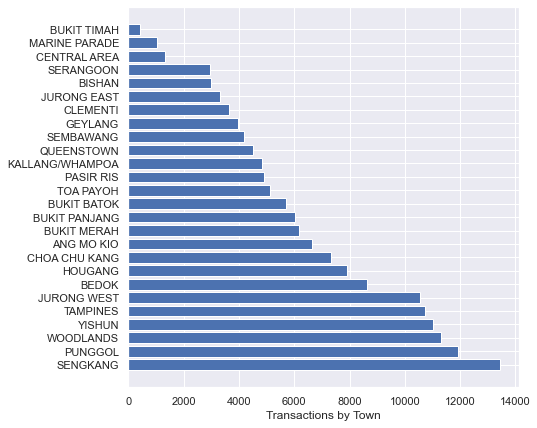

In [14]:
freq_town = cleandata.groupby('town').size().sort_values(ascending= False)
plt.figure(figsize=(7, 7))
plt.barh(freq_town.index, freq_town)
plt.xlabel('Transactions by Town')
plt.show()

# Five towns with the most transactions are Sengkang, Punggol, Woodlands, Yishun, and Tampines, respectively

In [15]:
freq_town.iloc[0:5]

# Top 5 towns with most transactions

town
SENGKANG     13457
PUNGGOL      11908
WOODLANDS    11313
YISHUN       11034
TAMPINES     10719
dtype: int64

### 2.2.2 Transactions by Flat Type

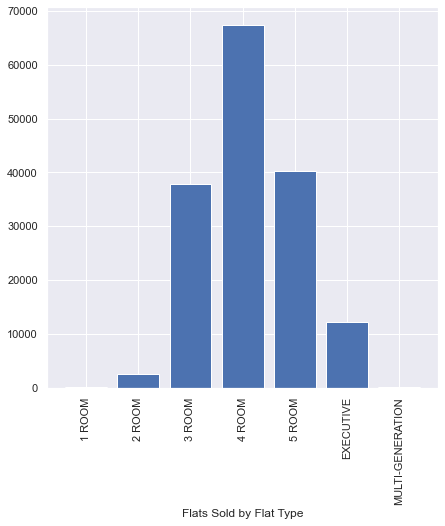

In [16]:
freq_type = cleandata.groupby('flat_type').size()
plt.figure(figsize=(7, 7))
plt.bar(freq_type.index, freq_type)
plt.xlabel('Flats Sold by Flat Type')
plt.xticks(rotation = 90)
plt.show()

In [17]:
# Since the frequency in 1-Room and Multi-Generation is too small to be visible on the chart,
# Let's just check the table

freq_type

flat_type
1 ROOM                 60
2 ROOM               2614
3 ROOM              37795
4 ROOM              67368
5 ROOM              40346
EXECUTIVE           12198
MULTI-GENERATION       73
dtype: int64

### 2.2.3  Monthly Transactions

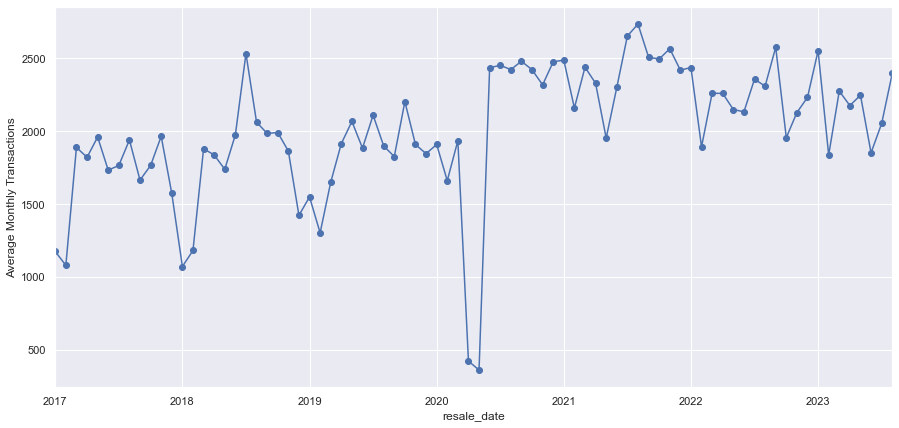

In [18]:
freq_time = cleandata.groupby('resale_date').size()

plt.figure(figsize=(15, 7))
freq_time.plot(marker = 'o')
plt.ylabel('Average Monthly Transactions');